In [3]:
import numpy as np  
import matplotlib.pyplot as plt
plt.style.use("./deeplearning.mplstyle")
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

## SoftMax function

In [6]:
def my_softmax(z):
    ez = np.exp(z)
    sm = ez/np.sum(ez)
    return(sm)

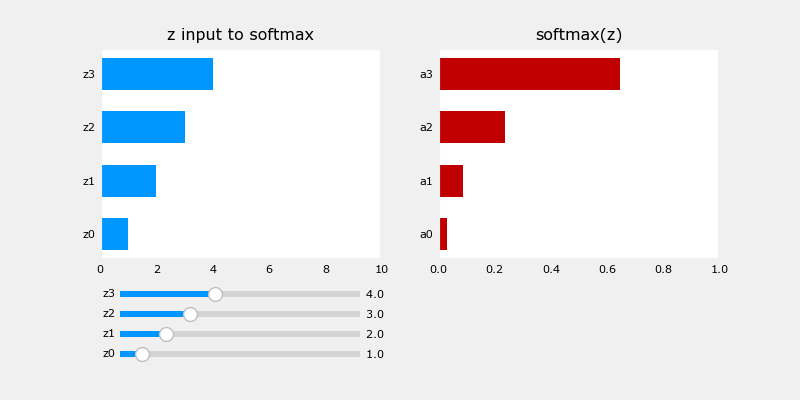

In [7]:
plt.close("all")
plt_softmax(my_softmax)

In [8]:
# make  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

### The *Obvious* organization

In [17]:
model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax') 
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=10
)
     

Epoch 1/10
63/63 [==============================] - 0s 925us/step - loss: 1.0653
Epoch 2/10
63/63 [==============================] - 0s 753us/step - loss: 0.4559
Epoch 3/10
63/63 [==============================] - 0s 746us/step - loss: 0.2104
Epoch 4/10
63/63 [==============================] - 0s 777us/step - loss: 0.1177
Epoch 5/10
63/63 [==============================] - 0s 774us/step - loss: 0.0852
Epoch 6/10
63/63 [==============================] - 0s 801us/step - loss: 0.0694
Epoch 7/10
63/63 [==============================] - 0s 886us/step - loss: 0.0605
Epoch 8/10
63/63 [==============================] - 0s 861us/step - loss: 0.0547
Epoch 9/10
63/63 [==============================] - 0s 774us/step - loss: 0.0504
Epoch 10/10
63/63 [==============================] - 0s 739us/step - loss: 0.0471


In [18]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 [==============================] - 0s 801us/step
[[8.56e-03 9.61e-03 9.49e-01 3.26e-02]
 [9.93e-01 6.62e-03 3.10e-04 6.54e-06]]
largest value 0.99999857 smallest value 4.774913e-11


### Preferred

In [20]:
preferred_model = Sequential([
    Dense(25, activation = 'relu'),
    Dense(15, activation = 'relu'),
    Dense(4, activation = 'linear') 
])

preferred_model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(0.001)
)
preferred_model.fit(
    X_train,y_train,
    epochs = 10
)

Epoch 1/10
63/63 [==============================] - 0s 886us/step - loss: 0.8635
Epoch 2/10
63/63 [==============================] - 0s 798us/step - loss: 0.3364
Epoch 3/10
63/63 [==============================] - 0s 779us/step - loss: 0.1511
Epoch 4/10
63/63 [==============================] - 0s 784us/step - loss: 0.0928
Epoch 5/10
63/63 [==============================] - 0s 749us/step - loss: 0.0697
Epoch 6/10
63/63 [==============================] - 0s 784us/step - loss: 0.0582
Epoch 7/10
63/63 [==============================] - 0s 800us/step - loss: 0.0505
Epoch 8/10
63/63 [==============================] - 0s 929us/step - loss: 0.0458
Epoch 9/10
63/63 [==============================] - 0s 950us/step - loss: 0.0415
Epoch 10/10
63/63 [==============================] - 0s 810us/step - loss: 0.0384


In [21]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 [==============================] - 0s 1ms/step
two example output vectors:
 [[-3.17 -2.17  2.96 -1.86]
 [ 4.44 -0.91 -3.51 -4.73]]
largest value 10.57963 smallest value -8.586206


In [22]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[2.16e-03 5.86e-03 9.84e-01 7.97e-03]
 [9.95e-01 4.74e-03 3.52e-04 1.04e-04]]
largest value 0.9999994 smallest value 1.5897895e-08


To select the most likely category, the softmax is not required. One can find the index of the largest output using [np.argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

In [23]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-3.17 -2.17  2.96 -1.86], category: 2
[ 4.44 -0.91 -3.51 -4.73], category: 0
[ 3.05 -0.35 -2.7  -3.79], category: 0
[-2.62  3.6  -2.13 -1.82], category: 1
[-1.12 -4.21  4.11 -4.6 ], category: 2


## SparseCategorialCrossentropy or CategoricalCrossEntropy
Tensorflow has two potential formats for target values and the selection of the loss defines which is expected.
- SparseCategorialCrossentropy: expects the target to be an integer corresponding to the index. For example, if there are 10 potential target values, y would be between 0 and 9. 
- CategoricalCrossEntropy: Expects the target value of an example to be one-hot encoded where the value at the target index is 1 while the other N-1 entries are zero. An example with 10 potential target values, where the target is 2 would be [0,0,1,0,0,0,0,0,0,0].
